© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**[Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, 5, 21](https://www.nature.com/articles/s43586-025-00392-0)**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

**Free access to a view-only version**: [https://WaLSA.tools/nrmp](https://WaLSA.tools/nrmp)

**Supplementary Information**: [https://WaLSA.tools/nrmp-si](https://WaLSA.tools/nrmp-si)

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [ ]:
import numpy as np # type: ignore
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_detrend_apod # type: ignore

#--------------------------------------------------------------------------

# Load synthetic data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_1D.fits')
signal_1d_data1= hdul[0].data  # 1D synthetic signal data
time = hdul[1].data  # Assuming time is in the second HDU (Extension HDU 1)
hdul.close()

hdul = fits.open(data_dir + 'NRMP_signal_1D_phase_shifted.fits')
signal_1d_data2 = hdul[0].data  # 1D synthetic signal data
hdul.close()

tdiff = np.diff(time)
cadence = np.median(tdiff)

# Welch Cross Spectrum using WaLSAtools
frequencies_welch, cospectrum_welch, phase_angle_welch, power1_welch, power2_welch, freq_coherence_welch, coherence_welch = WaLSAtools(
    data1=signal_1d_data2, 
    data2=signal_1d_data1,
    time=time, 
    method='welch',
    nperseg=500
)

# Wavelet Analysis using WaLSAtools - data1
wavelet_power_morlet1, wavelet_periods_morlet1, wavelet_significance_morlet1, coi_morlet1, _, _, _ = WaLSAtools(
    signal=signal_1d_data1, time=time, method='wavelet', siglevel=0.95, mother='morlet', GWS=False, RGWS=False
)

# Wavelet Analysis using WaLSAtools - data2
wavelet_power_morlet2, wavelet_periods_morlet2, wavelet_significance_morlet2, coi_morlet2, _, _, _ = WaLSAtools(
    signal=signal_1d_data2, time=time, method='wavelet', siglevel=0.95, mother='morlet', GWS=False, RGWS=False
)

# Wavelet Cross Spectrum using WaLSAtools
cross_power, cross_periods, cross_sig, cross_coi, coherence, coh_periods, coh_sig, coh_coi, phase_angle= WaLSAtools(
    data1=signal_1d_data2, 
    data2=signal_1d_data1,
    time=time,
    method='wavelet',
    nperm=1000,
    siglevel=0.95
)

# Detrend and Apodize the timeeries for plotting (note that these are done within the analysis routines above)
signal_1d_data1 = WaLSA_detrend_apod(signal_1d_data1, apod=0.1, pxdetrend=2, silent=True)
signal_1d_data2 = WaLSA_detrend_apod(signal_1d_data2, apod=0.1, pxdetrend=2, silent=True)

Welch processed.
Detrending and apodization complete.
Wavelet (morlet) processed.
Detrending and apodization complete.
Wavelet (morlet) processed.
Wavelet cross-power spectrum calculated.

Calculating wavelet cross-power significance:
Progress: 100.00%Wavelet coherence calculated.

Calculating wavelet coherence significance:
Progress: 100.00%

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/Fig6_cross-correlations_FFT_Wavelet.pdf'


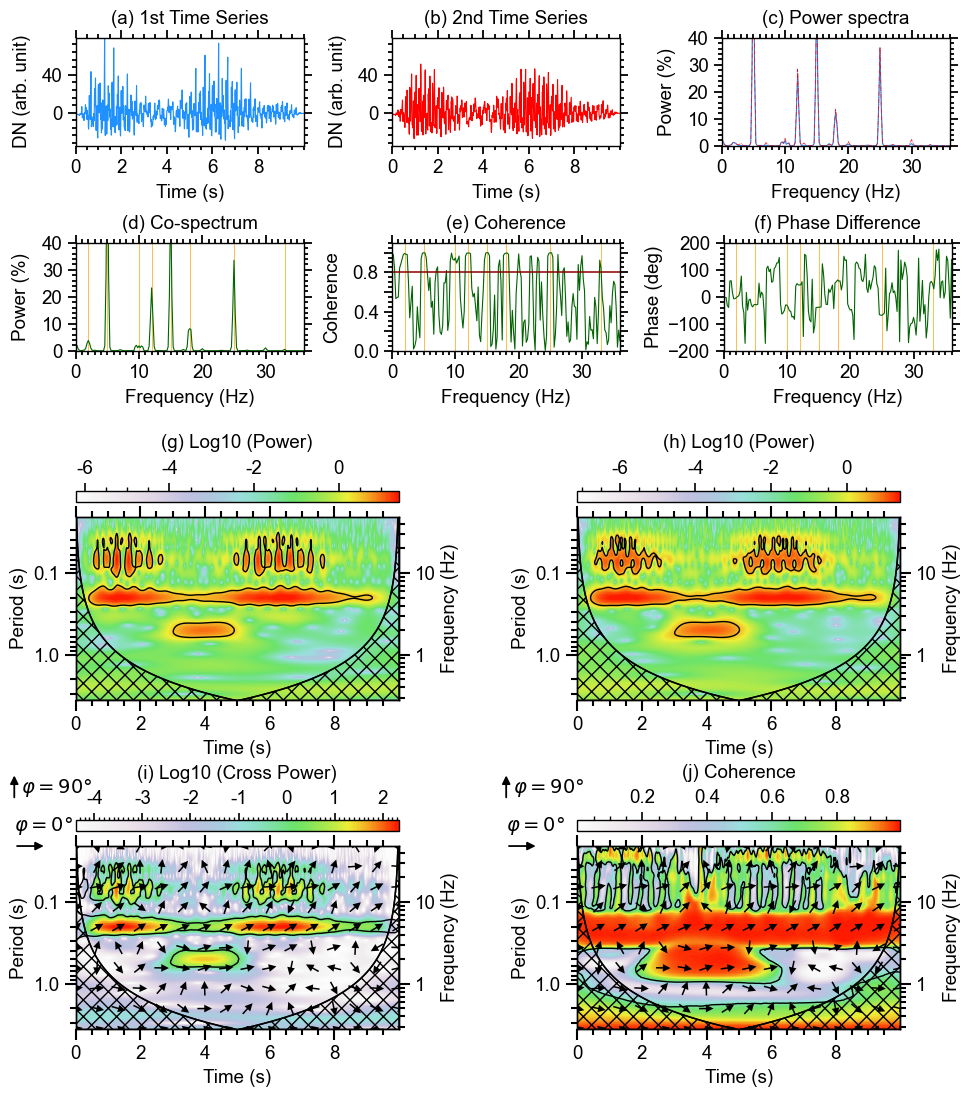

In [2]:
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter # type: ignore
from mpl_toolkits.axes_grid1 import make_axes_locatable # type: ignore
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # type: ignore
from WaLSAtools import WaLSA_save_pdf # type: ignore

# Setting global parameters
plt.rcParams.update({
    'font.family': 'sans-serif',     # Use sans-serif fonts
    'font.sans-serif': 'Arial',   # Set Helvetica as the default sans-serif font
    'font.size': 13.5,          # Global font size
    'axes.titlesize': 13.5,     # Title font size
    'axes.labelsize': 13.5,     # Axis label font size
    'xtick.labelsize': 13.5,    # X-axis tick label font size
    'ytick.labelsize': 13.5,    # Y-axis tick label font size
    'legend.fontsize': 13.5,    # Legend font size
    'figure.titlesize': 13.5,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
    'font.weight': 500,      # Make all fonts bold
    'axes.titleweight': 500, # Make title font bold
    'axes.labelweight': 500 # Make axis labels bold
})

plt.rc('axes', linewidth=1.0)
plt.rc('lines', linewidth=0.8)

pre_defined_freq = [2,5,10,12,15,18,25,33] # Mark pre-defined frequencies

# Set up the figure layout
fig = plt.figure(figsize=(9.5, 10.79))

#--------------------------------------------------------------------------
# FFT/Welch
plots_width = 0.24
plots_height = 0.10
positions = [[0.07, 0.872, plots_width, plots_height], [0.403, 0.872, plots_width, plots_height], [0.750, 0.872, plots_width, plots_height], 
             [0.07, 0.682, plots_width, plots_height], [0.403, 0.682, plots_width, plots_height], [0.752, 0.682, plots_width,plots_height]
             ] # [left, bottom, width, height]

# First 1D signal plot 
ax1 = fig.add_axes(positions[0])
ax1.plot(time, signal_1d_data1 * 10, color='dodgerblue')
ax1.set_xlabel('Time (s)', labelpad=5)
ax1.set_ylabel('DN (arb. unit)', labelpad=8)
ax1.set_title('(a) 1st Time Series', pad=10)
ax1.set_ylim(-35, 79)
ax1.set_xlim([0, 10])
# Set tick marks outside for all four axes
ax1.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax1.set_xticks(np.arange(0, 10, 2))
ax1.set_yticks(np.arange(0, 80, 40))
# Custom tick sizes and thickness
ax1.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax1.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

# Second 1D signal plot 
ax2 = fig.add_axes(positions[1])
ax2.plot(time, signal_1d_data2 * 10, color='red')
ax2.set_xlabel('Time (s)', labelpad=5)
ax2.set_ylabel('DN (arb. unit)', labelpad=8)
ax2.set_title('(b) 2nd Time Series', pad=10)
ax2.set_ylim(-35, 79)
ax2.set_xlim([0, 10])
# Set tick marks outside for all four axes
ax2.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax2.set_xticks(np.arange(0, 10, 2))
ax2.set_yticks(np.arange(0, 80, 40))
# Custom tick sizes and thickness
ax2.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax2.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))

# FFT Power Spectra
ax3 = fig.add_axes(positions[2])
ax3.plot(frequencies_welch, 85 * power1_welch / np.max(power1_welch), color='dodgerblue')
ax3.plot(frequencies_welch, 85 * power2_welch / np.max(power2_welch), linestyle='-.', color='red', linewidth=0.5)
ax3.set_xlabel('Frequency (Hz)', labelpad=5)
ax3.set_ylabel('Power (%)', labelpad=8)
ax3.set_title('(c) Power spectra', pad=10)
ax3.set_xlim([0, 36])
ax3.set_ylim(0, 40)
# Set tick marks outside for all four axes
ax3.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax3.set_xticks(np.arange(0, 36, 10))
ax3.set_yticks(np.arange(0, 41, 10))
# Custom tick sizes and thickness
ax3.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax3.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax3.xaxis.set_minor_locator(AutoMinorLocator(10))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))

# FFT Cross Spectrum
ax4 = fig.add_axes(positions[3])
for freqin in pre_defined_freq:
    ax4.axvline(x=freqin, color='orange', linewidth=0.5)
ax4.plot(frequencies_welch, 92 * cospectrum_welch / np.max(cospectrum_welch), color='DarkGreen')
ax4.set_xlabel('Frequency (Hz)', labelpad=5)
ax4.set_ylabel('Power (%)', labelpad=8)
ax4.set_title('(d) Co-spectrum', pad=10)
ax4.set_xlim([0, 36])
ax4.set_ylim(0, 40)
# Set tick marks outside for all four axes
ax4.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax4.set_xticks(np.arange(0, 36, 10))
ax4.set_yticks(np.arange(0, 41, 10))
# Custom tick sizes and thickness
ax4.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax4.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax4.xaxis.set_minor_locator(AutoMinorLocator(10))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))

# FFT Coherence
ax5 = fig.add_axes(positions[4])
for freqin in pre_defined_freq:
    ax5.axvline(x=freqin, color='orange', linewidth=0.5)
ax5.plot(freq_coherence_welch, coherence_welch, color='DarkGreen')
ax5.set_xlabel('Frequency (Hz)', labelpad=5)
ax5.set_ylabel('Coherence', labelpad=8)
ax5.set_title('(e) Coherence', pad=10)
ax5.set_xlim([0, 36])
ax5.set_ylim(0, 1.1)
# Set tick marks outside for all four axes
ax5.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax5.set_xticks(np.arange(0, 36, 10))
ax5.set_yticks(np.arange(0, 1.1, 0.2))
ax5.set_yticklabels(['0.0', ' ', '0.4', ' ', '0.8', ' '])
# Custom tick sizes and thickness
ax5.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax5.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax5.xaxis.set_minor_locator(AutoMinorLocator(10))
ax5.yaxis.set_minor_locator(AutoMinorLocator(4))
# Add a horizontal line at coherence = 0.8 (as a threshold)
ax5.axhline(y=0.8, color='darkred', linewidth=1.1)

# FFT Phase Differences
ax6 = fig.add_axes(positions[5])
for freqin in pre_defined_freq:
    ax6.axvline(x=freqin, color='orange', linewidth=0.5)
ax6.plot(frequencies_welch, phase_angle_welch, color='DarkGreen')
ax6.set_xlabel('Frequency (Hz)', labelpad=5)
ax6.set_ylabel('Phase (deg)', labelpad=4)
ax6.set_title('(f) Phase Difference', pad=10)
ax6.set_xlim([0, 36])
ax6.set_ylim(-200, 200)
# Set tick marks outside for all four axes
ax6.tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
ax6.set_xticks(np.arange(0, 36, 10))
ax6.set_yticks(np.arange(-200, 201, 100))
# Custom tick sizes and thickness
ax6.tick_params(axis='both', which='major', length=6, width=1.3)  # Major ticks
ax6.tick_params(axis='both', which='minor', length=3, width=1.3)  # Minor ticks
# Set minor ticks
ax6.xaxis.set_minor_locator(AutoMinorLocator(10))
ax6.yaxis.set_minor_locator(AutoMinorLocator(5))

#--------------------------------------------------------------------------
# Wavelet
plots_width = 0.34
plots_height = 0.17
wpositions = [[0.07, 0.358, plots_width, plots_height], [0.598, 0.358, plots_width, plots_height], 
             [0.07, 0.053, plots_width, plots_height], [0.598, 0.053, plots_width, plots_height],
             ] # [left, bottom, width, height]

# Load the RGB values from the IDL file, corresponding to IDL's "loadct, 20" color table
rgb_values = np.loadtxt('Color_Tables/idl_colormap_20.txt') # Load the RGB values
rgb_values = rgb_values / 255.0
idl_colormap_20 = ListedColormap(rgb_values)
#--------------------------------------------------------------------------
# Plot Wavelet power spectrum - data1
ax_inset_g = fig.add_axes(wpositions[0])
colorbar_label = '(g) Log10 (Power)'
ylabel='Period (s)'
xlabel='Time (s)'
cmap = plt.get_cmap(idl_colormap_20)

# Apply log10 transformation to the power and avoid negative or zero values
power = wavelet_power_morlet1
power[power <= 0] = np.nan  # Avoid log10 of zero or negative values
log_power = np.log10(power)  # Calculate log10 of the power

t = time
periods = wavelet_periods_morlet1
coi = coi_morlet1
sig_slevel = wavelet_significance_morlet1
dt = cadence

# Optional: Remove large periods outside the cone of influence (if enabled)
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        log_power = log_power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]

# Define levels for log10 color scaling (adjust to reflect log10 range)
min_log_power = np.nanmin(log_power)
max_log_power = np.nanmax(log_power)
levels = np.linspace(min_log_power, max_log_power, 100)  # Color levels for log10 scale

# Plot the wavelet power spectrum using log10(power)
# CS = ax_inset_g.contourf(t, periods, log_power, levels=levels, cmap=cmap, extend='neither')
CS = ax_inset_g.pcolormesh(t, periods, log_power, vmin=min_log_power, vmax=max_log_power, cmap=cmap, shading='auto')

# 95% significance contour (significance levels remain the same)
ax_inset_g.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.0])

# Cone-of-influence (COI)
ax_inset_g.plot(t, coi, '-k', lw=1.15)
ax_inset_g.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)

# Log scale for periods
ax_inset_g.set_ylim([np.min(periods), np.max(periods)])
ax_inset_g.set_yscale('log', base=10)
ax_inset_g.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_g.invert_yaxis()

# Set axis limits and labels
ax_inset_g.set_xlim([t.min(), t.max()])
ax_inset_g.set_ylabel(ylabel)
ax_inset_g.set_xlabel(xlabel)
ax_inset_g.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)

# Custom tick intervals
ax_inset_g.set_xticks(np.arange(0, 10, 2))

# Custom tick sizes and thickness
ax_inset_g.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_g.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_g.xaxis.set_minor_locator(AutoMinorLocator(4))

# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_g.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_g)
cax = inset_axes(ax_inset_g, width="100%", height="6%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')

# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')

# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=1.0, direction='out', top=True, bottom=False)

# Set custom tick locations for colorbar
custom_ticks = [0, -2, -4, -6]  # Specify tick positions (must be within log10(power) range)
cbar.set_ticks(custom_ticks)
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Set minor ticks on the colorbar
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4))

#--------------------------------------------------------------------------
# Plot Wavelet power spectrum - data2
ax_inset_h = fig.add_axes(wpositions[1])
colorbar_label = '(h) Log10 (Power)'
ylabel='Period (s)'
xlabel='Time (s)'
cmap = plt.get_cmap(idl_colormap_20)

# Apply log10 transformation to the power and avoid negative or zero values
power = wavelet_power_morlet2
power[power <= 0] = np.nan  # Avoid log10 of zero or negative values
log_power = np.log10(power)  # Calculate log10 of the power

t = time
periods = wavelet_periods_morlet2
coi = coi_morlet2
sig_slevel = wavelet_significance_morlet2
dt = cadence

# Optional: Remove large periods outside the cone of influence (if enabled)
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        log_power = log_power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]

# Define levels for log10 color scaling (adjust to reflect log10 range)
min_log_power = np.nanmin(log_power)
max_log_power = np.nanmax(log_power)
levels = np.linspace(min_log_power, max_log_power, 100)  # Color levels for log10 scale

# Plot the wavelet power spectrum using log10(power)
# CS = ax_inset_h.contourf(t, periods, log_power, levels=levels, cmap=cmap, extend='neither')
CS = ax_inset_h.pcolormesh(t, periods, log_power, vmin=min_log_power, vmax=max_log_power, cmap=cmap, shading='auto')

# 95% significance contour (significance levels remain the same)
ax_inset_h.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.0])

# Cone-of-influence (COI)
ax_inset_h.plot(t, coi, '-k', lw=1.15)
ax_inset_h.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)

# Log scale for periods
ax_inset_h.set_ylim([np.min(periods), np.max(periods)])
ax_inset_h.set_yscale('log', base=10)
ax_inset_h.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_h.invert_yaxis()

# Set axis limits and labels
ax_inset_h.set_xlim([t.min(), t.max()])
ax_inset_h.set_ylabel(ylabel)
ax_inset_h.set_xlabel(xlabel)
ax_inset_h.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)

# Custom tick intervals
ax_inset_h.set_xticks(np.arange(0, 10, 2))

# Custom tick sizes and thickness
ax_inset_h.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_h.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_h.xaxis.set_minor_locator(AutoMinorLocator(4))

# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_h.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_h)
cax = inset_axes(ax_inset_h, width="100%", height="6%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')

# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')

# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=1.0, direction='out', top=True, bottom=False)

# Set custom tick locations for colorbar
custom_ticks = [0, -2, -4, -6]  # Specify tick positions (must be within log10(power) range)
cbar.set_ticks(custom_ticks)
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Set minor ticks on the colorbar
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4))

#--------------------------------------------------------------------------
# Plot Wavelet cross power spectrum 
ax_inset_i = fig.add_axes(wpositions[2])
colorbar_label = '(i) Log10 (Cross Power)'
ylabel = 'Period (s)'
xlabel = 'Time (s)'
cmap = plt.get_cmap(idl_colormap_20)

# Apply log10 transformation to the power and avoid negative or zero values
power = cross_power
power[power <= 0] = np.nan  # Avoid log10 of zero or negative values

# Rescaling to those from IDL (for comapring visualization only). 
# The power absolute values are different from IDL (due to different normalization), 
# but the relative values are the same.
power = np.interp(power, (power.min(), power.max()), (4.1e-5, 2.14e2))

log_power = np.log10(power)  # Calculate log10 of the power

t = time
periods = cross_periods
coi = cross_coi
sig_slevel = cross_sig
dt = cadence
phase = phase_angle

# Optional: Remove large periods outside the cone of influence (if enabled)
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        log_power = log_power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]
        phase = phase[:cutoff_index, :] 

# Define levels for log10 color scaling (adjust to reflect log10 range)
min_log_power = np.nanmin(log_power)
max_log_power = np.nanmax(log_power)
levels = np.linspace(min_log_power, max_log_power, 100)  # Color levels for log10 scale

# Plot the wavelet cross power spectrum using log10(power)
# CS = ax_inset_i.contourf(t, periods, log_power, levels=levels, cmap=cmap, extend='neither')
CS = ax_inset_i.pcolormesh(t, periods, log_power, vmin=min_log_power, vmax=max_log_power, cmap=cmap, shading='auto')

# 95% significance contour (significance levels remain the same)
ax_inset_i.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.0])

# Cone-of-influence (COI)
ax_inset_i.plot(t, coi, '-k', lw=1.15)
ax_inset_i.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)

# Log scale for periods
ax_inset_i.set_ylim([np.min(periods), np.max(periods)])
ax_inset_i.set_yscale('log', base=10)
ax_inset_i.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_i.invert_yaxis()

# Set axis limits and labels
ax_inset_i.set_xlim([t.min(), t.max()])
ax_inset_i.set_ylabel(ylabel)
ax_inset_i.set_xlabel(xlabel)
ax_inset_i.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)

# Custom tick intervals
ax_inset_i.set_xticks(np.arange(0, 10, 2))

# Custom tick sizes and thickness
ax_inset_i.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_i.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_i.xaxis.set_minor_locator(AutoMinorLocator(4))

# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_i.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_i)
caxi = inset_axes(ax_inset_i, width="100%", height="6%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=caxi, orientation='horizontal')

# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')

# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=5, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=2.5, width=1.0, direction='out', top=True, bottom=False)

# Set custom tick locations for colorbar
custom_ticks = [2,1,0,-1,-2,-3,-4]  # Specify tick positions
cbar.set_ticks(custom_ticks)
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))

# Set minor ticks on the colorbar
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# ------------ Add Phase Arrows ------------
arrow_density_x = 16  # Number of arrows in the x direction
arrow_density_y = 10  # Number of arrows in the y direction
fixed_arrow_size = 0.045  # Fixed size of all arrows

# Create arrow grid (uniform spacing in t and log10(periods))
x_indices = np.linspace(0, len(t) - 1, arrow_density_x, dtype=int)
y_log_indices = np.linspace(0, len(periods) - 1, arrow_density_y, dtype=int)

# Create the meshgrid for X and Y positions of the arrows
X, Y = np.meshgrid(t[x_indices], periods[y_log_indices])  # Get actual periods from log10 positions

# Extract the phase angle components (u, v) for the selected grid points
uu = np.cos(phase)  # x-component of the arrows
vv = np.sin(phase)  # y-component of the arrows
u = uu[y_log_indices[:, None], x_indices]
v = vv[y_log_indices[:, None], x_indices]

# Normalize u and v to create unit vectors (we need to plot direction only, not magnitude)
magnitude = np.sqrt(u**2 + v**2)
u_normalized = u / magnitude  # Normalize to unit vector
v_normalized = v / magnitude  # Normalize to unit vector

# Set all arrows to the same small fixed size
u_fixed = fixed_arrow_size * u_normalized
v_fixed = fixed_arrow_size * v_normalized

# Plot the arrows on top of the contour plot
ax_inset_i.quiver(
    X, Y, u_fixed, v_fixed, 
    color='black', 
    scale=1,  # No further scaling
    units='width',  # Size of arrows fixed relative to width
    pivot='middle',  # Center the arrow at its position
    headwidth=5,  # Arrowhead width
    headlength=5,  # Arrowhead length
    headaxislength=5,  # Length of arrowhead along the axis
    linewidth=1.3  # Line thickness for arrows
)

# Add reference arrow for φ = 0° pointing to the right
start_pos = (-0.19, 1.0)  # Start position of the arrow (x1, y1) relative to data
end_pos = (-0.09, 1.0)  # End position of the arrow (x2, y2) relative to data
ax_inset_i.annotate(
    '',  # No text, just the arrow
    xy=end_pos,  # Position of the arrowhead
    xytext=start_pos,  # Start of the arrow (where the line starts)
    xycoords='axes fraction',  # Fraction of the plot (use axes fraction if outside the plot)
    arrowprops=dict(
        arrowstyle='-|>',  # Full, filled arrowhead
        color='black',  # Arrow color
        linewidth=1.3,  # Thickness of the arrow line
        mutation_scale=12,  # Controls the size of the arrowhead
    )
)
ax_inset_i.text(
    start_pos[0] + 0.0,  # Offset the x position a bit to the right of the arrowhead
    start_pos[1] + 0.08,  # Offset the y position a bit above the arrowhead
    r'$\varphi=0\degree$',  # LaTeX for phi (φ) and degrees (°)
    transform=ax_inset_i.transAxes,  # Relative to the plot's axes
    fontsize=14, 
    fontweight='bold'
)
# Add reference arrows for φ = 90° pointing upwards
start_pos = (-0.19, 1.25)  # Start position of the arrow (x1, y1) relative to data
end_pos = (-0.19, 1.40)  # End position of the arrow (x2, y2) relative to data
ax_inset_i.annotate(
    '',  # No text, just the arrow
    xy=end_pos,  # Position of the arrowhead
    xytext=start_pos,  # Start of the arrow (where the line starts)
    xycoords='axes fraction',  # Fraction of the plot (use axes fraction if outside the plot)
    arrowprops=dict(
        arrowstyle='-|>',  # Full, filled arrowhead
        color='black',  # Arrow color
        linewidth=1.3,  # Thickness of the arrow line
        mutation_scale=12,  # Controls the size of the arrowhead
    )
)
ax_inset_i.text(
    start_pos[0] + 0.02,  # Offset the x position a bit to the right of the arrowhead
    start_pos[1] + 0.04,  # Offset the y position a bit above the arrowhead
    r'$\varphi=90\degree$',  # LaTeX for phi (φ) and degrees (°)
    transform=ax_inset_i.transAxes,  # Relative to the plot's axes
    fontsize=14, 
    fontweight='bold'
)

#--------------------------------------------------------------------------
# Plot Wavelet coherence spectrum 
ax_inset_j = fig.add_axes(wpositions[3])
colorbar_label = '(j) Coherence'
ylabel = 'Period (s)'
xlabel = 'Time (s)'
cmap = plt.get_cmap(idl_colormap_20)

# Apply log10 transformation to the power and avoid negative or zero values
power = coherence

t = time
periods = coh_periods
coi = coh_coi
sig_slevel = coh_sig
dt = cadence
phase = phase_angle

# Optional: Remove large periods outside the cone of influence (if enabled)
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        power = power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]
        phase = phase[:cutoff_index, :] 

# Define levels for log10 color scaling (adjust to reflect log10 range)
min_power = np.nanmin(power)
max_power = np.nanmax(power)
levels = np.linspace(min_power, max_power, 100)  # Color levels for log10 scale

# Plot the wavelet cross power spectrum using log10(power)
# CS = ax_inset_j.contourf(t, periods, power, levels=levels, cmap=cmap, extend='neither')
CS = ax_inset_j.pcolormesh(t, periods, power, vmin=min_power, vmax=max_power, cmap=cmap, shading='auto')

# 95% significance contour (significance levels remain the same)
ax_inset_j.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.0])

# Cone-of-influence (COI)
ax_inset_j.plot(t, coi, '-k', lw=1.15)
ax_inset_j.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)

# Log scale for periods
ax_inset_j.set_ylim([np.min(periods), np.max(periods)])
ax_inset_j.set_yscale('log', base=10)
ax_inset_j.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_j.invert_yaxis()

# Set axis limits and labels
ax_inset_j.set_xlim([t.min(), t.max()])
ax_inset_j.set_ylabel(ylabel)
ax_inset_j.set_xlabel(xlabel)
ax_inset_j.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)

# Custom tick intervals
ax_inset_j.set_xticks(np.arange(0, 10, 2))

# Custom tick sizes and thickness
ax_inset_j.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_j.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_j.xaxis.set_minor_locator(AutoMinorLocator(4))

# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_j.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_j)
cax = inset_axes(ax_inset_j, width="100%", height="6%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')

# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')

# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=1.0, direction='out', top=True, bottom=False)

# Set custom tick locations for colorbar
custom_ticks = [0.2, 0.4, 0.6, 0.8]  # Specify tick positions (must be within log10(power) range)
cbar.set_ticks(custom_ticks)
cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Set minor ticks on the colorbar
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4))

# ------------ Add Phase Arrows ------------
# Create arrow grid (uniform spacing in t and log10(periods))
x_indices = np.linspace(0, len(t) - 1, arrow_density_x, dtype=int)
y_log_indices = np.linspace(0, len(periods) - 1, arrow_density_y, dtype=int)

# Create the meshgrid for X and Y positions of the arrows
X, Y = np.meshgrid(t[x_indices], periods[y_log_indices])  # Get actual periods from log10 positions

# Extract the phase angle components (u, v) for the selected grid points
uu = np.cos(phase)  # x-component of the arrows
vv = np.sin(phase)  # y-component of the arrows
u = uu[y_log_indices[:, None], x_indices]
v = vv[y_log_indices[:, None], x_indices]

# Normalize u and v to create unit vectors (we need to plot direction only, not magnitude)
magnitude = np.sqrt(u**2 + v**2)
u_normalized = u / magnitude  # Normalize to unit vector
v_normalized = v / magnitude  # Normalize to unit vector

# Set all arrows to the same small fixed size
u_fixed = fixed_arrow_size * u_normalized
v_fixed = fixed_arrow_size * v_normalized

# Plot the arrows on top of the contour plot
ax_inset_j.quiver(
    X, Y, u_fixed, v_fixed, 
    color='black', 
    scale=1,  # No further scaling
    units='width',  # Size of arrows fixed relative to width
    pivot='middle',  # Center the arrow at its position
    headwidth=5,  # Arrowhead width
    headlength=5,  # Arrowhead length
    headaxislength=5,  # Length of arrowhead along the axis
    linewidth=1.3  # Line thickness for arrows
)


# Plot arrows only witin significance areas
# u = np.cos(phase)  # x-component of the arrows
# v = np.sin(phase)  # y-component of the arrows
# ###Masking u,v to keep only thos within significance
# u_sig = u
# v_sig = v
# mask_sig = sig_slevel
# mask_sig[mask_sig>=1] = 1
# mask_sig[mask_sig<1] = np.nan
# u_sig  = u_sig*mask_sig
# v_sig  = v_sig*mask_sig

# ax_inset_j.quiver(t[::25], periods[::5], u_sig[::5, ::25], v_sig[::5, ::25], units='height',
#            angles='uv', pivot='mid', linewidth=0.5, edgecolor='k',
#            headwidth=5, headlength=5, headaxislength=2, minshaft=2,
#            minlength=5)


# Add reference arrow for φ = 0° pointing to the right
start_pos = (-0.22, 1.0)  # Start position of the arrow (x1, y1) relative to data
end_pos = (-0.12, 1.0)  # End position of the arrow (x2, y2) relative to data
ax_inset_j.annotate(
    '',  # No text, just the arrow
    xy=end_pos,  # Position of the arrowhead
    xytext=start_pos,  # Start of the arrow (where the line starts)
    xycoords='axes fraction',  # Fraction of the plot (use axes fraction if outside the plot)
    arrowprops=dict(
        arrowstyle='-|>',  # Full, filled arrowhead
        color='black',  # Arrow color
        linewidth=1.3,  # Thickness of the arrow line
        mutation_scale=12,  # Controls the size of the arrowhead
    )
)
ax_inset_j.text(
    start_pos[0] + 0.0,  # Offset the x position a bit to the right of the arrowhead
    start_pos[1] + 0.08,  # Offset the y position a bit above the arrowhead
    r'$\varphi=0\degree$',  # LaTeX for phi (φ) and degrees (°)
    transform=ax_inset_j.transAxes,  # Relative to the plot's axes
    fontsize=14, 
    fontweight='bold'
)
# Add reference arrows for φ = 90° pointing upwards
start_pos = (-0.22, 1.25)  # Start position of the arrow (x1, y1) relative to data
end_pos = (-0.22, 1.40)  # End position of the arrow (x2, y2) relative to data
ax_inset_j.annotate(
    '',  # No text, just the arrow
    xy=end_pos,  # Position of the arrowhead
    xytext=start_pos,  # Start of the arrow (where the line starts)
    xycoords='axes fraction',  # Fraction of the plot (use axes fraction if outside the plot)
    arrowprops=dict(
        arrowstyle='-|>',  # Full, filled arrowhead
        color='black',  # Arrow color
        linewidth=1.3,  # Thickness of the arrow line
        mutation_scale=12,  # Controls the size of the arrowhead
    )
)
ax_inset_j.text(
    start_pos[0] + 0.02,  # Offset the x position a bit to the right of the arrowhead
    start_pos[1] + 0.04,  # Offset the y position a bit above the arrowhead
    r'$\varphi=90\degree$',  # LaTeX for phi (φ) and degrees (°)
    transform=ax_inset_j.transAxes,  # Relative to the plot's axes
    fontsize=14, 
    fontweight='bold'
)

#--------------------------------------------------------------------------

# Save the figure as a single PDF
pdf_path = 'Figures/Fig6_cross-correlations_FFT_Wavelet.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK')

plt.show()

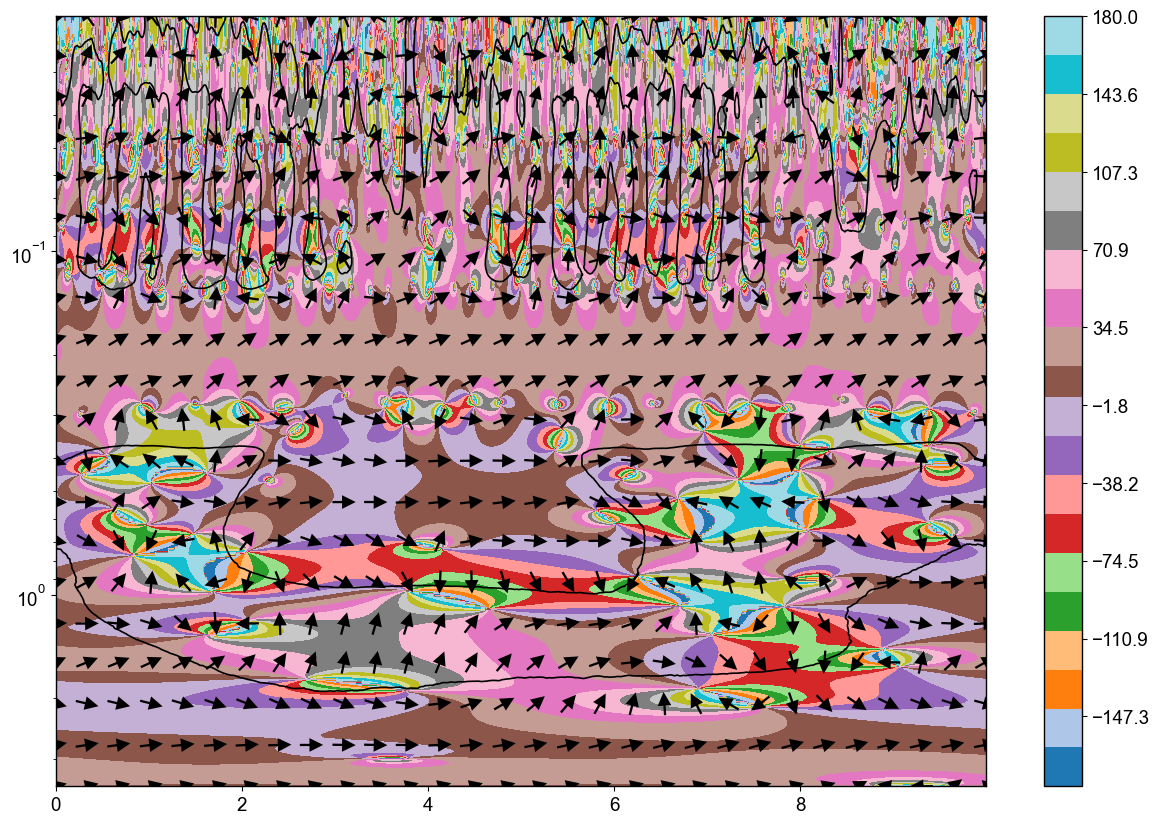

In [3]:
# Test how the arrows reprenest phase angles:
# We should note that the phase angle (u, v) might not match exactly the same points where the arrows are being plotted. 
# This happens because the wavelet power spectrum and phase angle arrays have a much finer grid resolution than the arrow grid.
# We cannot plot arrows at every single point in the wavelet power spectrum, so we have to downsample the phase angle array to match the arrow grid.
# This downsampling can lead to slight misalignment between the arrows and the phase angle values, but they should be close enough for visual inspection.
# We can test this by plotting the phase angle values directly on top of the arrows to see if they match.
# For a more accurate representation (if really necessary), one solution could be to interpolate the phase angle values to match the arrow grid exactly.
# As a final note, for any scientific analysis/interpretation the phase angle values should be used directly from the phase angle array, not from the arrows.

fig = plt.figure(figsize=(15, 10))

param = np.degrees(phase)

levels = np.linspace(np.nanmin(param), np.nanmax(param), num=100)

CS = plt.contourf(t, periods, param, levels=levels, cmap='tab20', extend='neither')

plt.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.2])

plt.ylim([np.min(periods), np.max(periods)])
plt.yscale('log', base=10)
plt.gca().invert_yaxis()
cbar = plt.colorbar(CS)

# ------------ Add Phase Arrows ------------
arrow_density_x = 30  # Number of arrows in the x direction
arrow_density_y = 20  # Number of arrows in the y direction
fixed_arrow_size = 0.025  # Fixed size of all arrows

# Create arrow grid (uniform spacing in t and log10(periods))
x_indices = np.linspace(0, len(t) - 1, arrow_density_x, dtype=int)
y_log_indices = np.linspace(0, len(periods) - 1, arrow_density_y, dtype=int)

# Create the meshgrid for X and Y positions of the arrows
X, Y = np.meshgrid(t[x_indices], periods[y_log_indices])  # Get actual periods from log10 positions

# Extract the phase angle components (u, v) for the selected grid points
uu = np.cos(phase)  # x-component of the arrows
vv = np.sin(phase)  # y-component of the arrows
u = uu[y_log_indices[:, None], x_indices]
v = vv[y_log_indices[:, None], x_indices]

# Normalize u and v to create unit vectors (we need to plot direction only, not magnitude)
magnitude = np.sqrt(u**2 + v**2)
u_normalized = u / magnitude  # Normalize to unit vector
v_normalized = v / magnitude  # Normalize to unit vector

# Set all arrows to the same small fixed size
u_fixed = fixed_arrow_size * u_normalized
v_fixed = fixed_arrow_size * v_normalized

# Plot the arrows on top of the contour plot
plt.quiver(
    X, Y, u_fixed, v_fixed, 
    color='black', 
    scale=1,  # No further scaling
    units='width',  # Size of arrows fixed relative to width
    pivot='middle',  # Center the arrow at its position
    headwidth=6,  # Arrowhead width
    headlength=6,  # Arrowhead length
    headaxislength=6,  # Length of arrowhead along the axis
    linewidth=1.5  # Line thickness for arrows
)

plt.show()

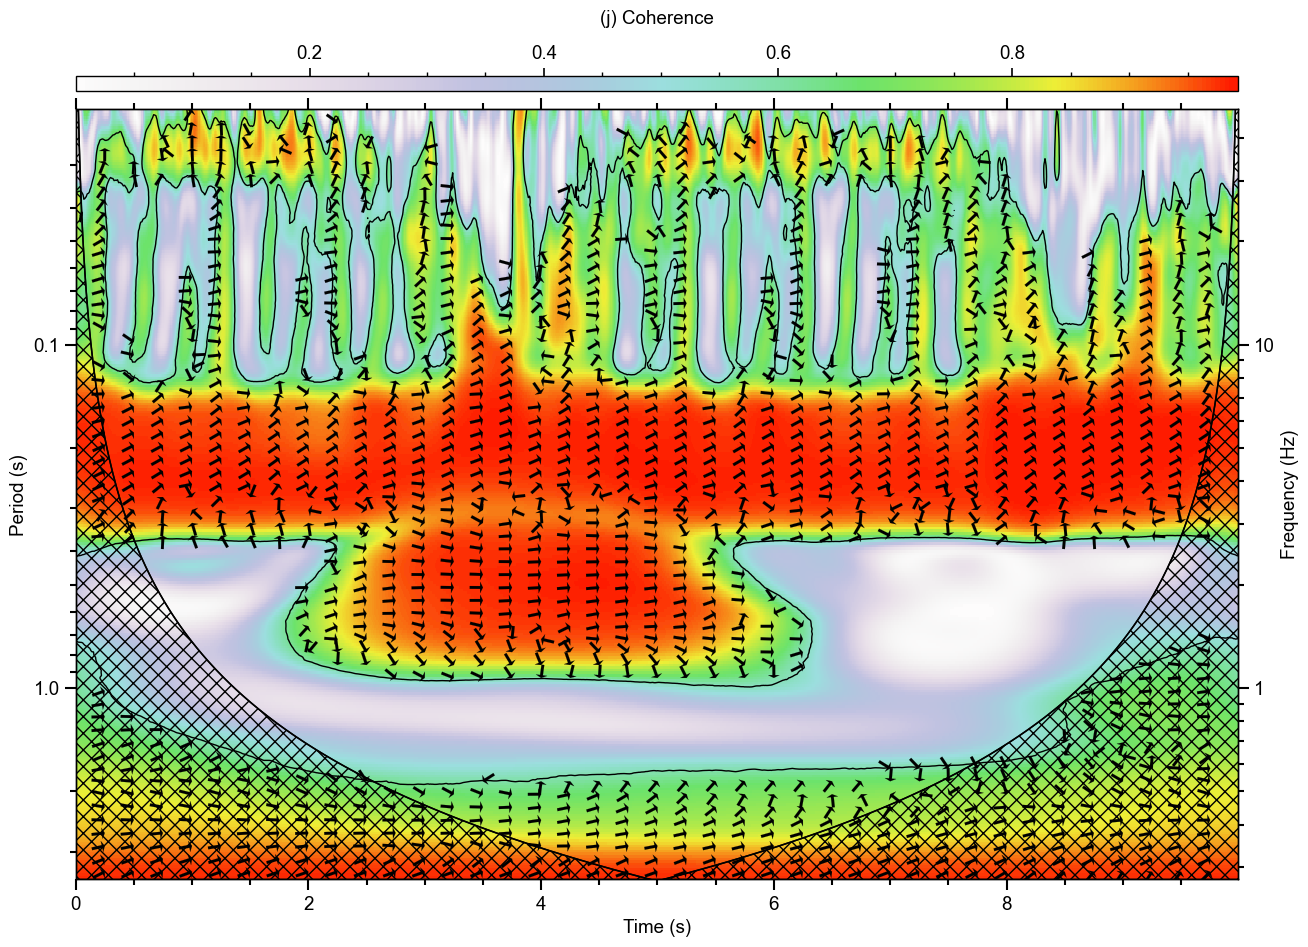

In [4]:
# Plot Wavelet coherence spectrum 
# Test: plot denser arrows within significance areas

fig = plt.figure(figsize=(15, 10))
ax_inset_j = plt.gca()  # Get the current active axes
colorbar_label = '(j) Coherence'
ylabel = 'Period (s)'
xlabel = 'Time (s)'
cmap = plt.get_cmap(idl_colormap_20)

# Apply log10 transformation to the power and avoid negative or zero values
power = coherence

t = time
periods = coh_periods
coi = coh_coi
sig_slevel = coh_sig
dt = cadence
phase = phase_angle

# Optional: Remove large periods outside the cone of influence (if enabled)
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        power = power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]
        phase = phase[:cutoff_index, :] 

# Define levels for log10 color scaling (adjust to reflect log10 range)
min_power = np.nanmin(power)
max_power = np.nanmax(power)
levels = np.linspace(min_power, max_power, 100)  # Color levels for log10 scale

# Plot the wavelet cross power spectrum using log10(power)
# CS = ax_inset_j.contourf(t, periods, power, levels=levels, cmap=cmap, extend='neither')
CS = ax_inset_j.pcolormesh(t, periods, power, vmin=min_power, vmax=max_power, cmap=cmap, shading='auto')

# 95% significance contour (significance levels remain the same)
ax_inset_j.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[1.0])

# Cone-of-influence (COI)
ax_inset_j.plot(t, coi, '-k', lw=1.15)
ax_inset_j.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)

# Log scale for periods
ax_inset_j.set_ylim([np.min(periods), np.max(periods)])
ax_inset_j.set_yscale('log', base=10)
ax_inset_j.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_j.invert_yaxis()

# Set axis limits and labels
ax_inset_j.set_xlim([t.min(), t.max()])
ax_inset_j.set_ylabel(ylabel)
ax_inset_j.set_xlabel(xlabel)
ax_inset_j.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)

# Custom tick intervals
ax_inset_j.set_xticks(np.arange(0, 10, 2))

# Custom tick sizes and thickness
ax_inset_j.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_j.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_j.xaxis.set_minor_locator(AutoMinorLocator(4))

# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_j.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)

# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_j)
cax = inset_axes(ax_inset_j, width="100%", height="2%", loc='upper center', borderpad=-1.8)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')

# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=15)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')

# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=1.0, direction='out', top=True, bottom=False)

# Set custom tick locations for colorbar
custom_ticks = [0.2, 0.4, 0.6, 0.8]  # Specify tick positions (must be within log10(power) range)
cbar.set_ticks(custom_ticks)
cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Set minor ticks on the colorbar
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4))

u = np.cos(phase)  # x-component of the arrows
v = np.sin(phase)  # y-component of the arrows
###Masking u,v to keep only thos within significance
u_sig = u
v_sig = v
mask_sig = sig_slevel
mask_sig[mask_sig>=1] = 1
mask_sig[mask_sig<1] = np.nan
u_sig  = u_sig*mask_sig
v_sig  = v_sig*mask_sig

# ax_inset_j.contour(t, periods, mask_sig, levels=[1], colors='k',linewidths=[5])

ax_inset_j.quiver(t[::25], periods[::5], u_sig[::5, ::25], v_sig[::5, ::25], units='height',
           angles='uv', pivot='tip', linewidth=0.1, edgecolor='k',
           headwidth=4, headlength=1, headaxislength=1, minshaft=1,
           minlength=1)

plt.show()